# CardioAnalytics

# **Comprehensive Analysis & Visualization with Python**

## Greetings everyone,

### **Heart Disease (Cardiovascular Disease - CVD)**

**Heart disease**, also known as **Cardiovascular Disease (CVD)**, refers to a variety of conditions affecting the heart and blood vessels. It is one of the leading causes of death globally, accounting for a staggering **17.9 million deaths (32.1%)** in 2015. 

- **Key Facts**:
  - CVDs are more prevalent and increasing in **developing countries**.
  - In **developed countries**, the death rates have been declining since the 1970s, though CVD remains a significant health issue.
  
The high mortality rate due to heart disease highlights the importance of understanding its causes and finding ways to prevent and treat these conditions. 

---

## **Exploratory Data Analysis (EDA)**

In this kernel, I’ve conducted an **Exploratory Data Analysis (EDA)** on a **Heart Disease dataset**. 

### What is EDA?

**Exploratory Data Analysis (EDA)** is an essential process in analyzing a new dataset. It helps us to:

- Understand the **distribution of data**.
- Identify **patterns**, **outliers**, and **anomalies**.
- Generate **hypotheses** for further testing.
  
The primary goals of EDA are to analyze data to identify trends, distributions, and relationships between variables. Visualization plays a key role in this process as it allows us to better understand the underlying structure and key characteristics of the data.

---

## **Key Aspects of EDA**:

- **Distribution Patterns**: Checking how variables are distributed.
- **Outliers & Anomalies**: Identifying data points that do not fit the expected patterns.
- **Trend Analysis**: Exploring relationships between variables.
  
Through this analysis, we generate insights that guide further exploration and model-building.

---

## **Why EDA is Important?**

EDA provides the following benefits:

1. **Better understanding** of data and relationships.
2. **Visual Insights** that help in hypothesis generation.
3. **Guidance** for feature engineering and model building.
  
---

## **Objective of this Kernel**

In this notebook, we will:
- Explore and visualize the data to uncover trends and patterns.
- Detect any anomalies or outliers.
- Analyze how different features correlate with heart disease status (our target variable).

> Let's dive into the data and uncover the hidden patterns!

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [29]:
df=pd.read_csv("heart.csv")

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
df.shape

(303, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [21]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [37]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [49]:
df['target'].unique()

array([1, 0], dtype=int64)

In [51]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

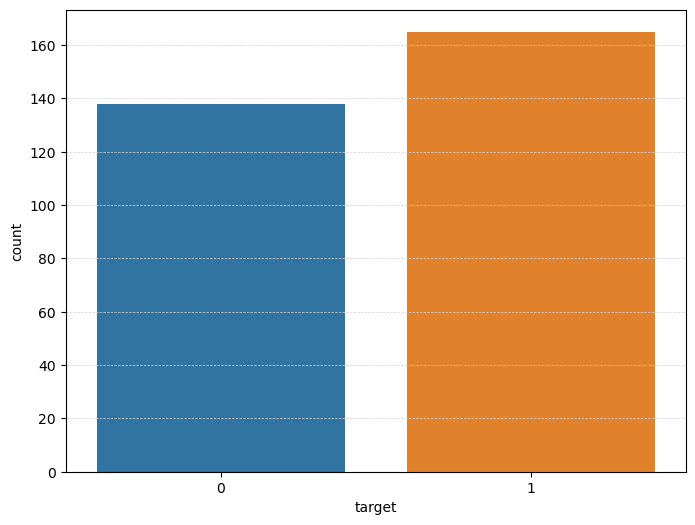

In [83]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',data=df)
ax.grid(axis='y', color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

# Interpretation

- The above plot confirms the findings that -

   - There are 165 patients suffering from heart disease, and 
   
   - There are 138 patients who do not have any heart disease.

# Frequency distribution of target with respect to sex

In [73]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

# Frequency Distribution of Heart Disease by Sex

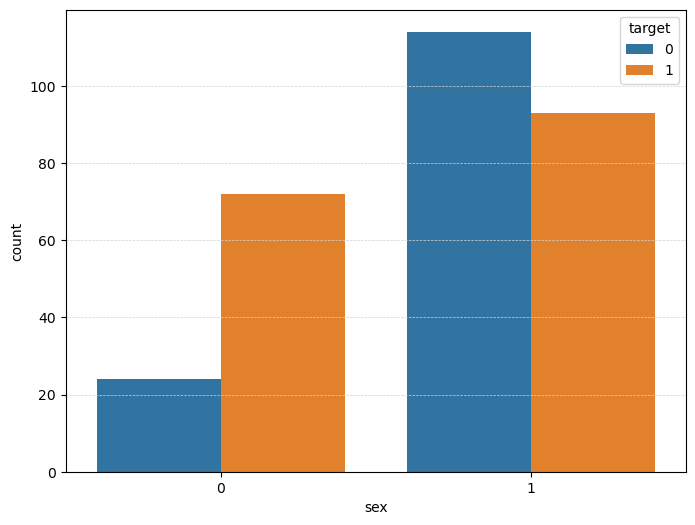

In [85]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
ax.grid(axis='y', color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

# Interpretation
 Females(0): 96 total; 72 with heart disease (75%), 24 do not have heart disease.
 Males(1): 207 total; 93 with heart disease (45%), 114 do not have heart disease.
 Summary: Higher heart disease prevalence in females (75%) than males (45%).

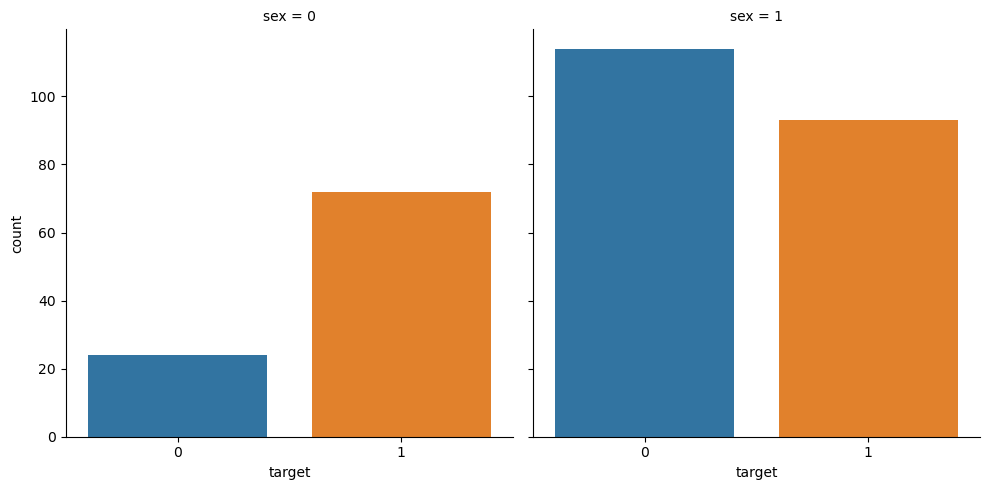

In [89]:
ax = sns.catplot(x="target", col="sex", data=df, kind="count", height=5, aspect=1)

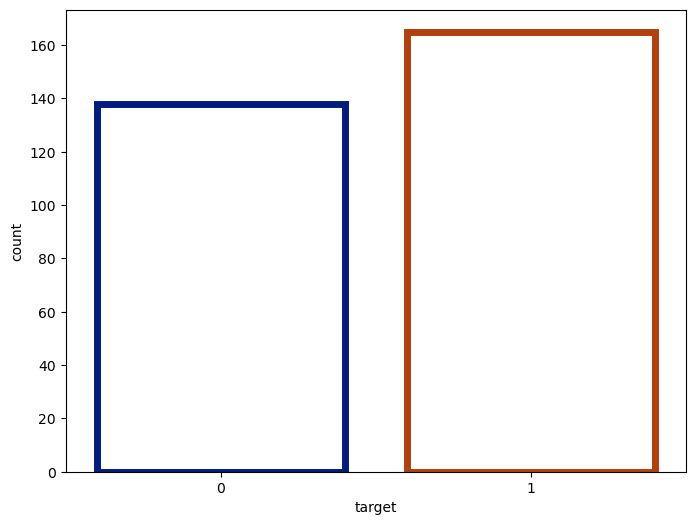

In [325]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.show()

#### Comment

- I have visualize the `target` values distribution wrt `sex`. 

- We can follow the same principles and visualize the `target` values distribution wrt `fbs (fasting blood sugar)` and `exang (exercise induced angina)`.

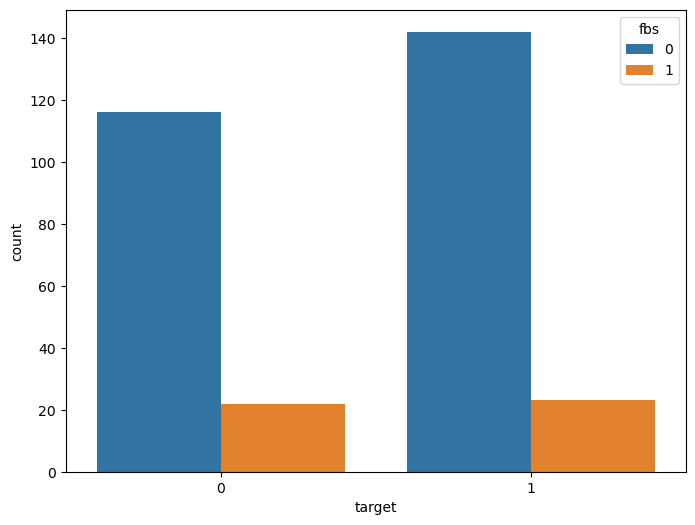

In [101]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='fbs',data=df)
plt.show()

target: This represents heart disease status, 
where typically 1 means heart disease is present, and 0 means it is absent.
hue="exang": This color-codes the bars based on exang values 
(0 = no exercise-induced angina, 1 = exercise-induced angina)

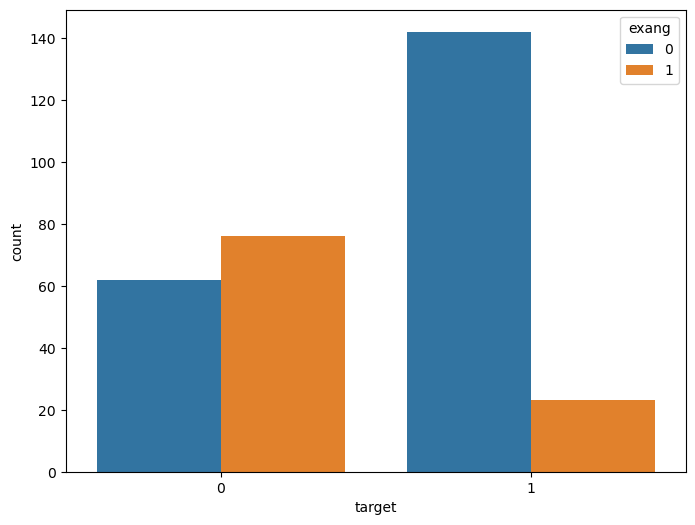

In [103]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exang", data=df)
plt.show()

In [105]:
correlation =df.corr()

In [107]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

# Interpretation of Correlation Coefficient
Range: Correlation coefficients range from -1 to +1.

- +1: Strong positive correlation.
- -1: Strong negative correlation.
- 0: No correlation.
#Findings:

- `fbs` has almost no correlation with `target`.
- `cp` and `thalach` have a mild positive correlation with `target`.
- Based on this, further analysis will focus on the interaction between `cp`, `thalach`, and `target`.

# Explore `cp` variable
- `cp` stands for chest pain type.
- First, I will check number of unique values in `cp` variable.

In [126]:
df['cp']

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

In [128]:
df['cp'].nunique()

4

So, there are 4 unique values in `cp` variable. Hence, it is a categorical variable.

In [133]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

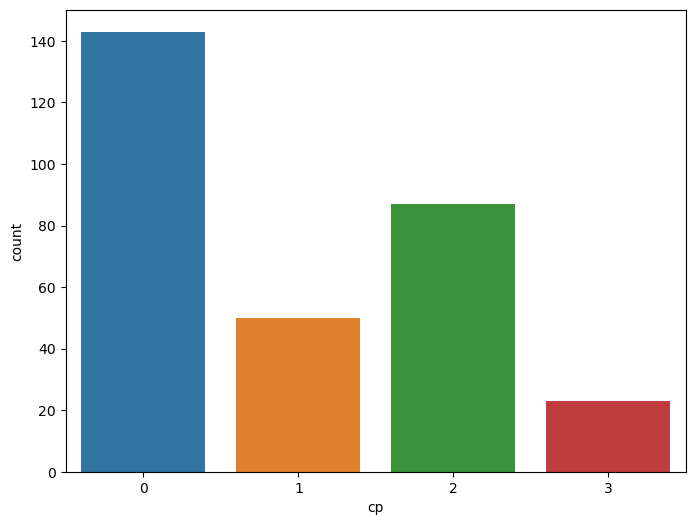

In [135]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',data=df)
plt.show()

In [137]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

- `target`: (1 = Presence of heart disease; 0 = Absence of heart disease)
- So, the above analysis gives `target` variable values categorized into presence and absence of heart disease and groupby `cp` variable values.

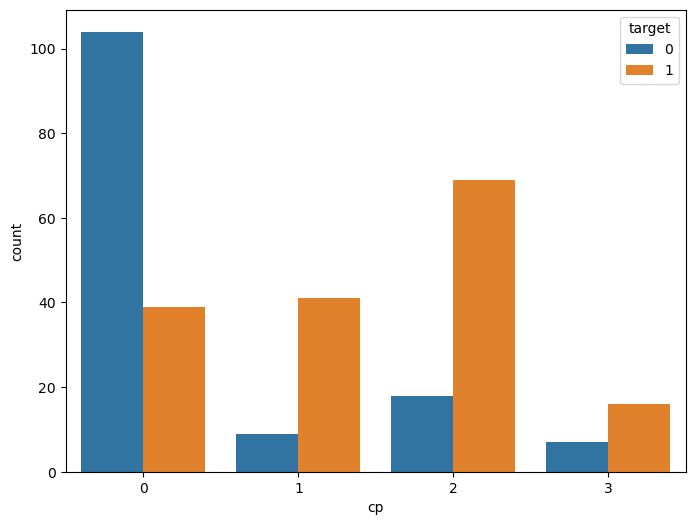

In [141]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", hue="target", data=df)
plt.show()

#### Explore `thalach` variable


- `thalach` stands for maximum heart rate achieved.

- I will check number of unique values in `thalach` variable as follows :

In [150]:
df['thalach'].nunique()

91

- So, number of unique values in `thalach` variable is 91. Hence, it is numerical variable.

- I will visualize its frequency distribution of values as follows :

# Visualize the frequency distribution of thalach variable

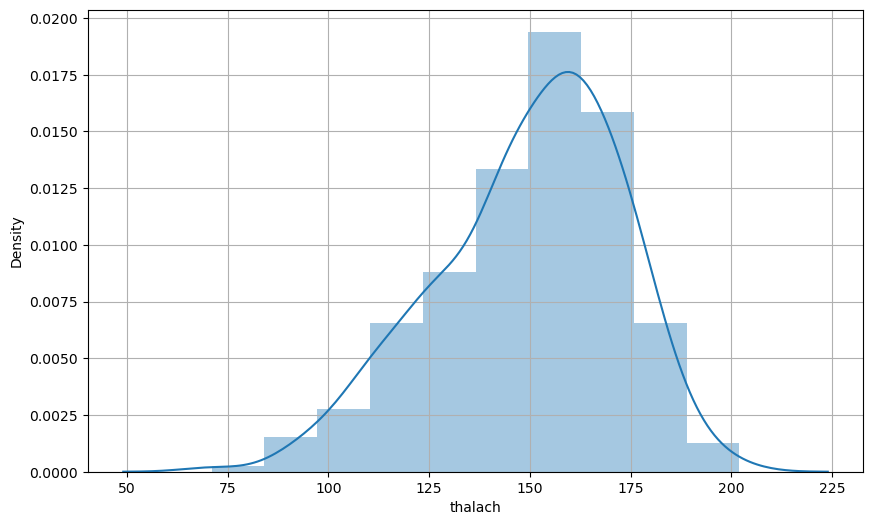

In [156]:
f,ax = plt.subplots(figsize=(10,6))
x=df['thalach']
ax=sns.distplot(x,bins=10)
plt.grid()
plt.show()

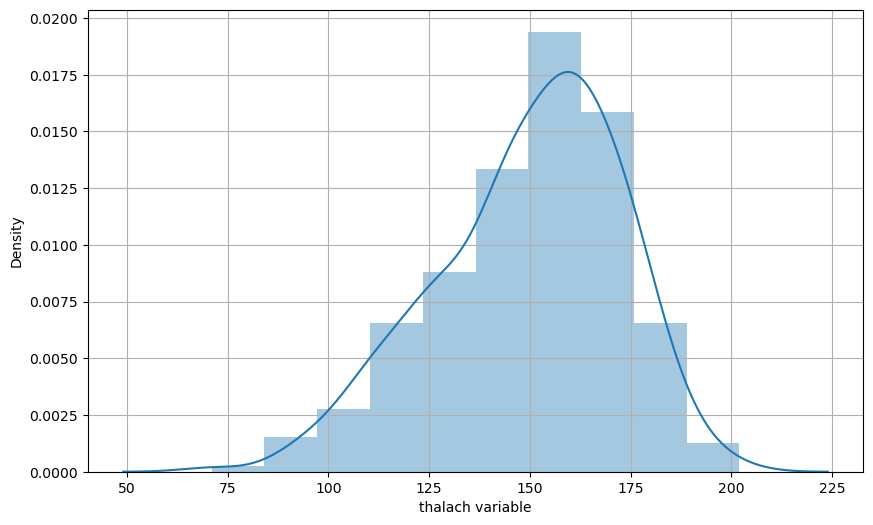

In [165]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.distplot(x, bins=10)
plt.grid()
plt.show()

# KDE Kernel Density Estimation

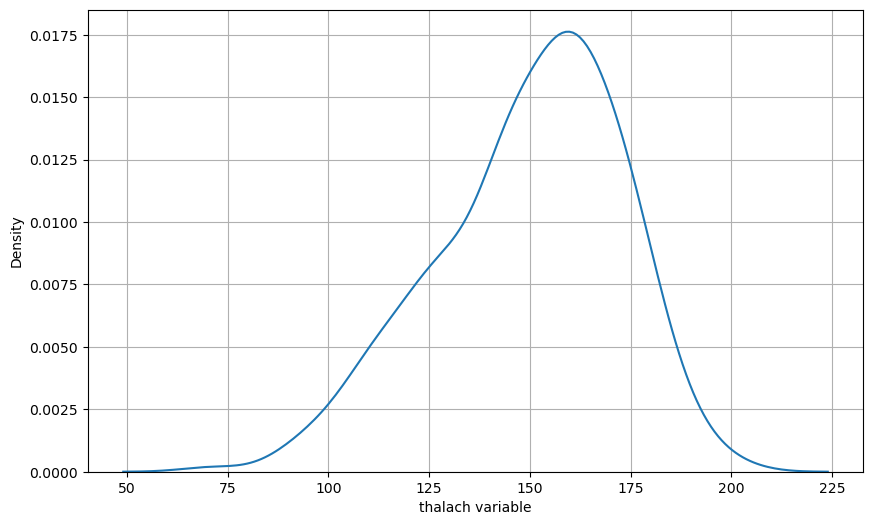

In [170]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x)
plt.grid()
plt.show()

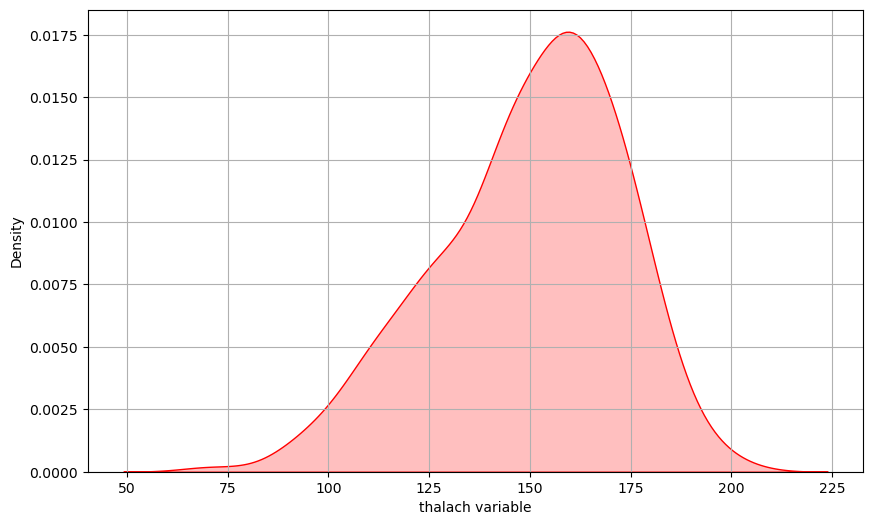

In [172]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x,shade =True,color ='r')
plt.grid()
plt.show()

# histogram

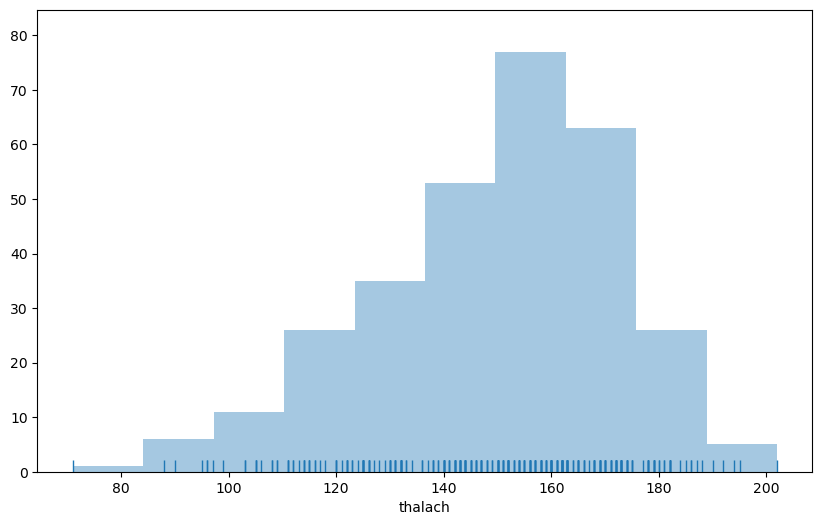

In [177]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

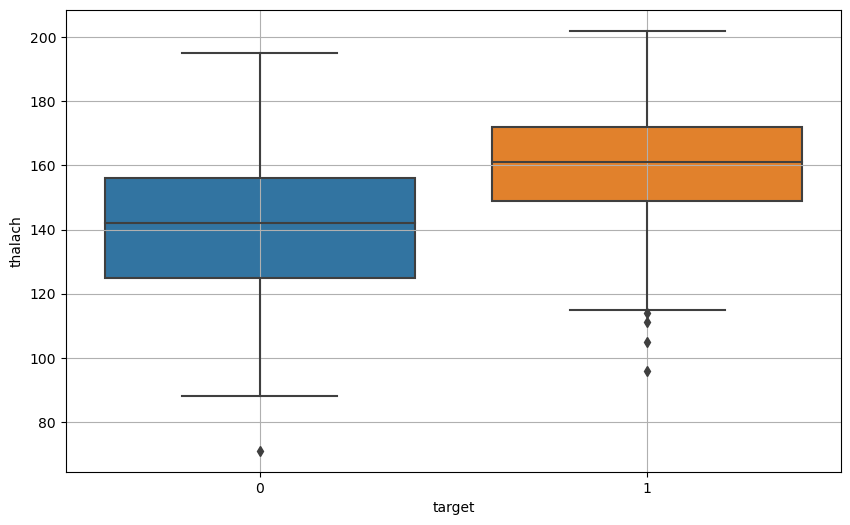

In [179]:
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='target',y='thalach',data=df)
plt.grid()
plt.show()

### Discover patterns and relationships

- An important step in EDA is to discover patterns and relationships between variables in the dataset. 

- I will use `heat map` and `pair plot` to discover the patterns and relationships in the dataset.

- First of all, I will draw a `heat map`.

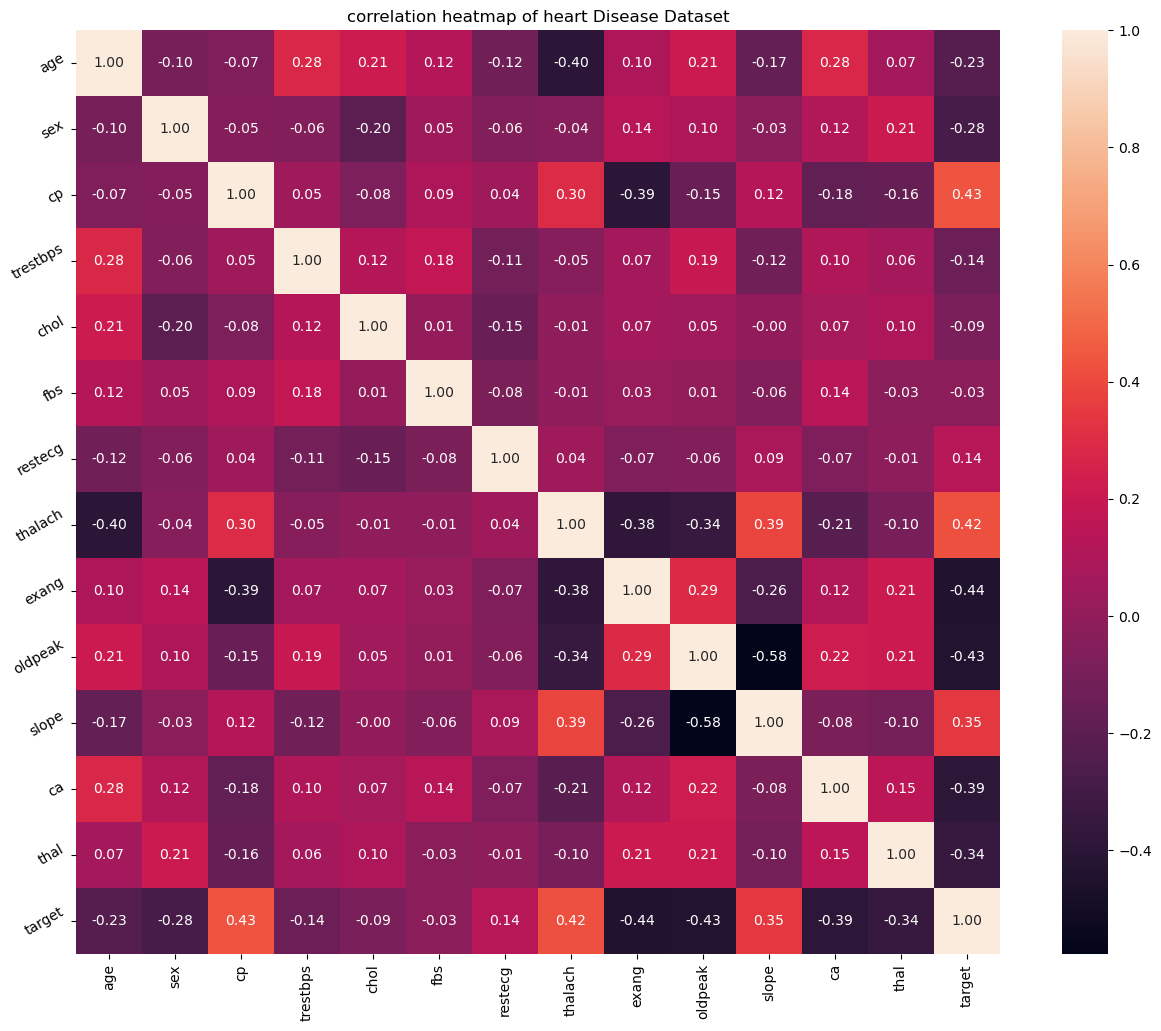

In [184]:
plt.figure(figsize=(16,12))
plt.title('correlation heatmap of heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)  
plt.show()

#### Interpretation

From the above correlation heat map, we can conclude that :-

- `target` and `cp` variable are mildly positively correlated (correlation coefficient = 0.43).

- `target` and `thalach` variable are also mildly positively correlated (correlation coefficient = 0.42).

- `target` and `slope` variable are weakly positively correlated (correlation coefficient = 0.35).

- `target` and `exang` variable are mildly negatively correlated (correlation coefficient = -0.44).

- `target` and `oldpeak` variable are also mildly negatively correlated (correlation coefficient = -0.43).

- `target` and `ca` variable are weakly negatively correlated (correlation coefficient = -0.39).

- `target` and `thal` variable are also waekly negatively correlated (correlation coefficient = -0.34).


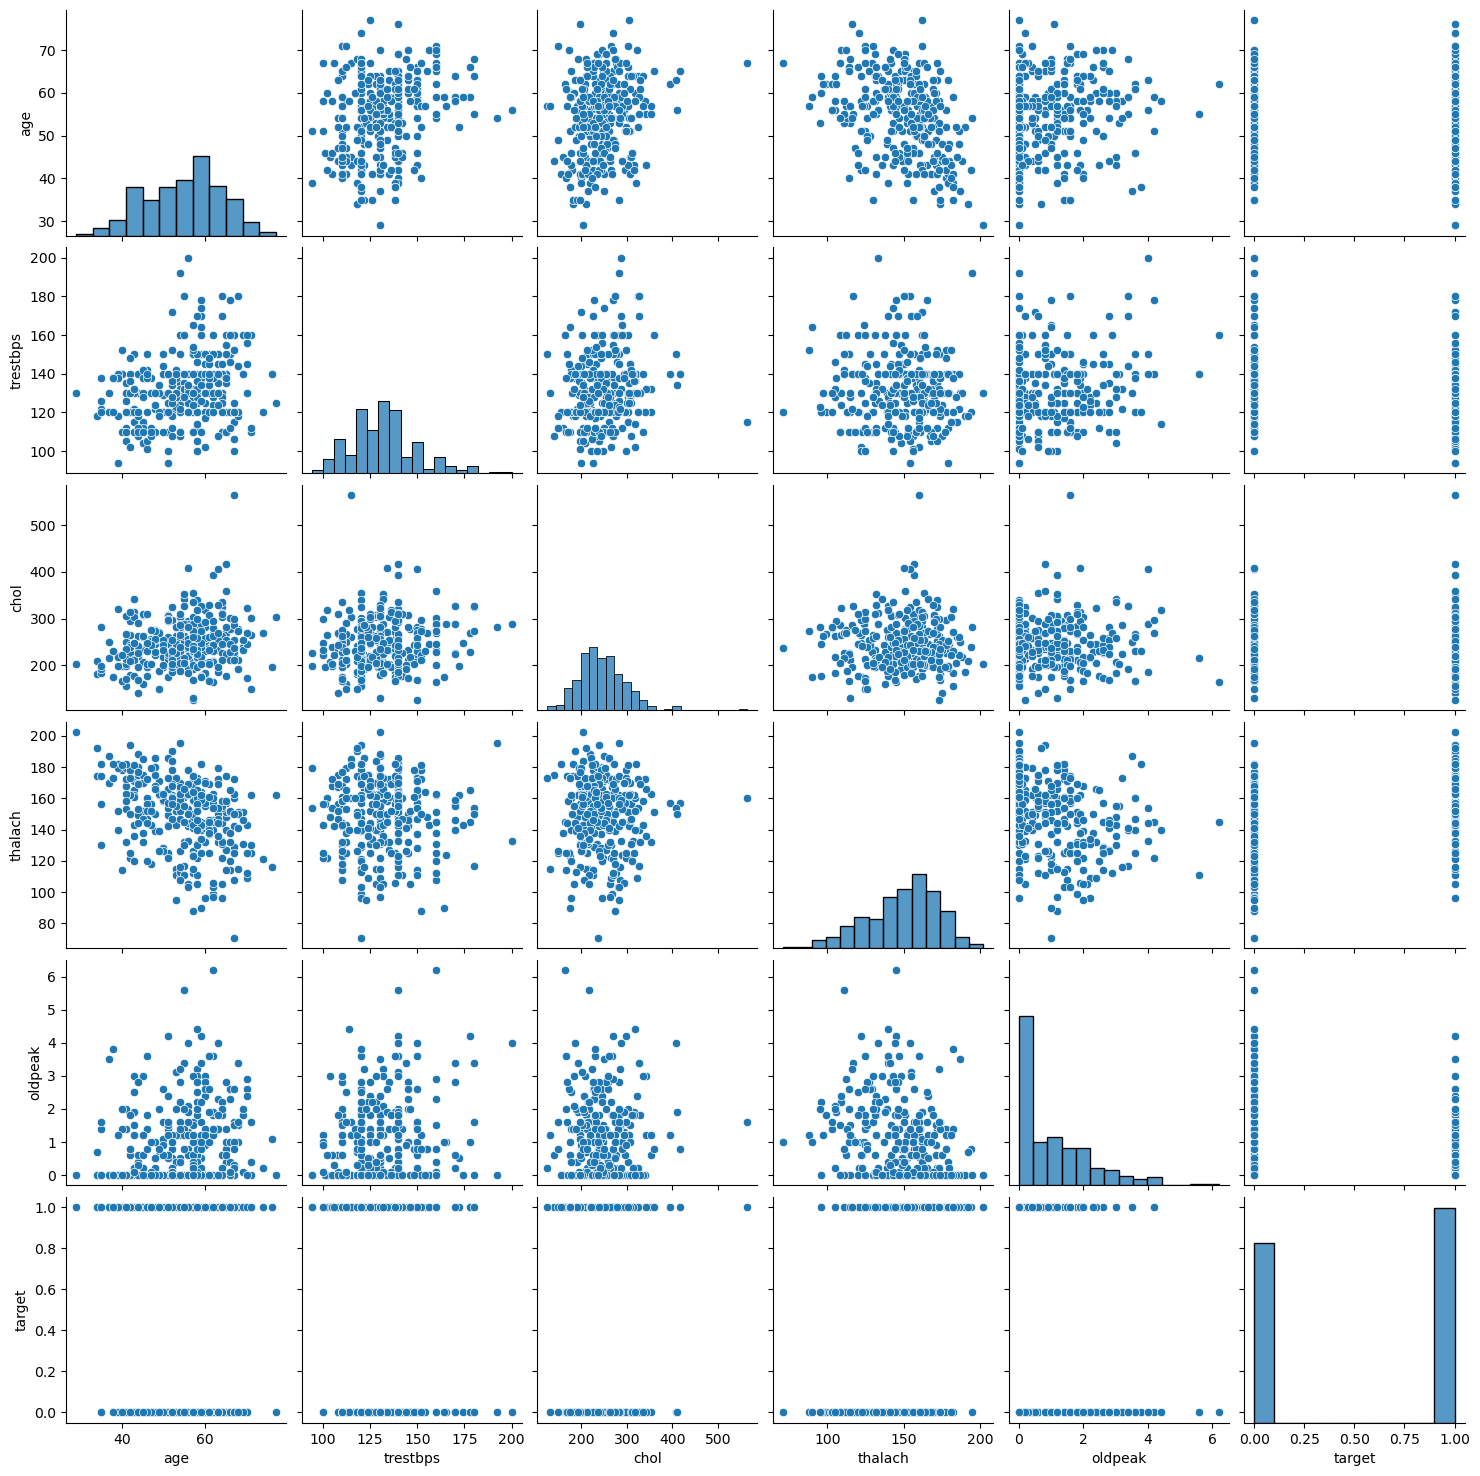

In [194]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

### Analysis of `age` and other variables

In [203]:
df['age'].nunique()

41

In [205]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

#### Interpretation

- The mean value of the `age` variable is 54.37 years.

- The minimum and maximum values of `age` are 29 and 77 years.

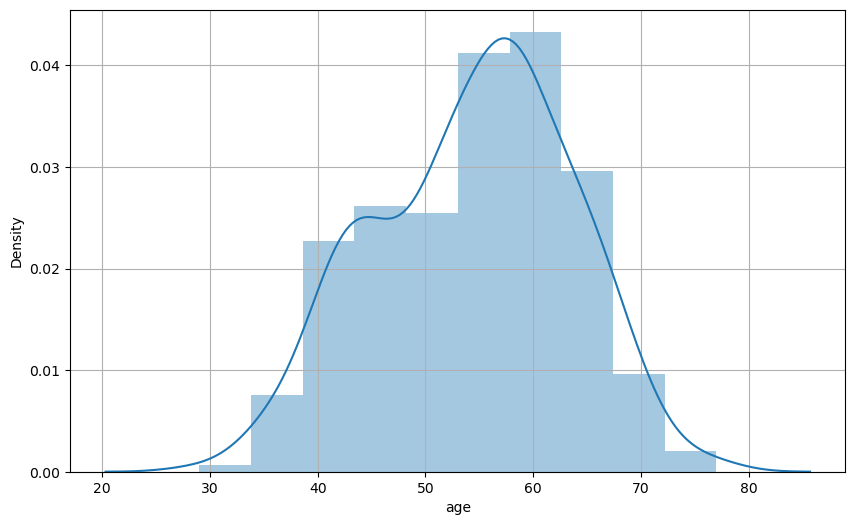

In [210]:
f, ax = plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.grid()
plt.show()

# Analyze `age` and `target` variable

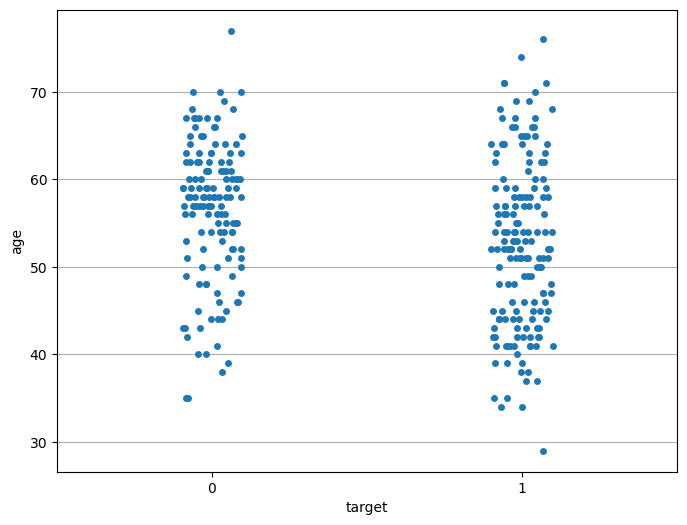

In [215]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="age", data=df)
plt.grid(axis='y')
plt.show()

# Boxplot 

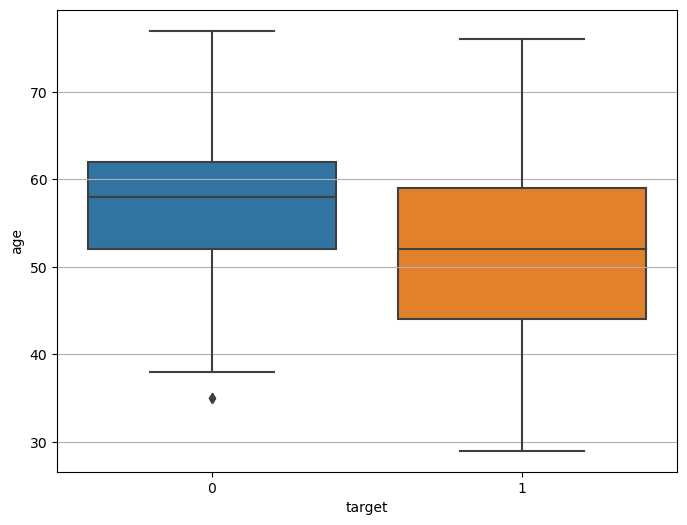

In [222]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df)
plt.grid(axis='y')
plt.show()

#### Interpretation

- The above boxplot tells two different things :

  - The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.
  
  - The dispersion or spread of age of the people who have heart disease is greater than the dispersion or spread of age of the people who do not have heart disease.


### Analyze `age` and `trestbps` variable

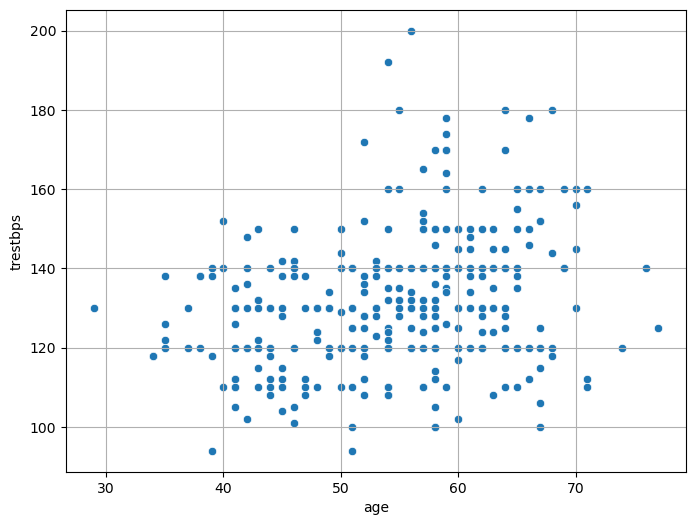

In [228]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="trestbps", data=df)
plt.grid()
plt.show()


#### Interpretation

- The above scatter plot shows that there is no correlation between `age` and `trestbps` variable.

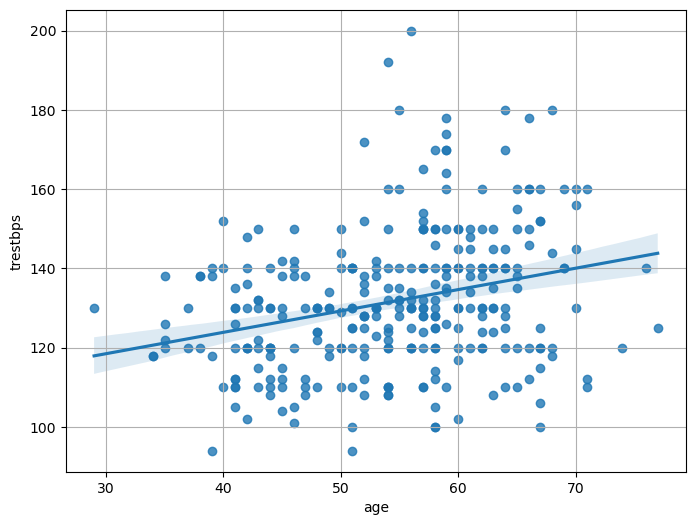

In [231]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=df)
plt.grid()
plt.show()


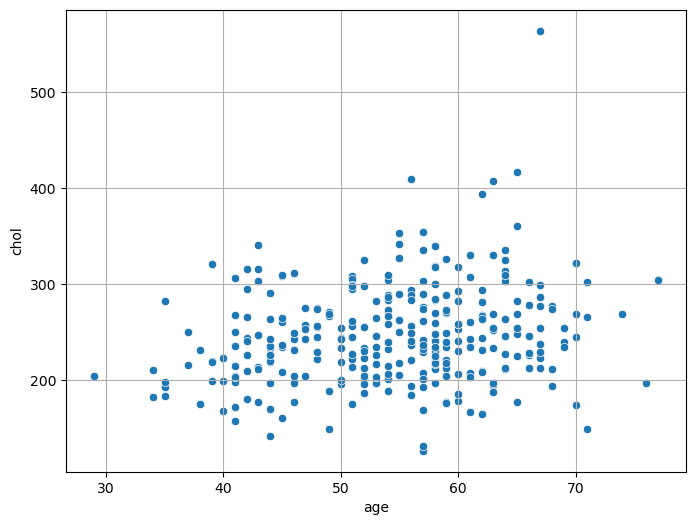

In [233]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="chol", data=df)
plt.grid()
plt.show()


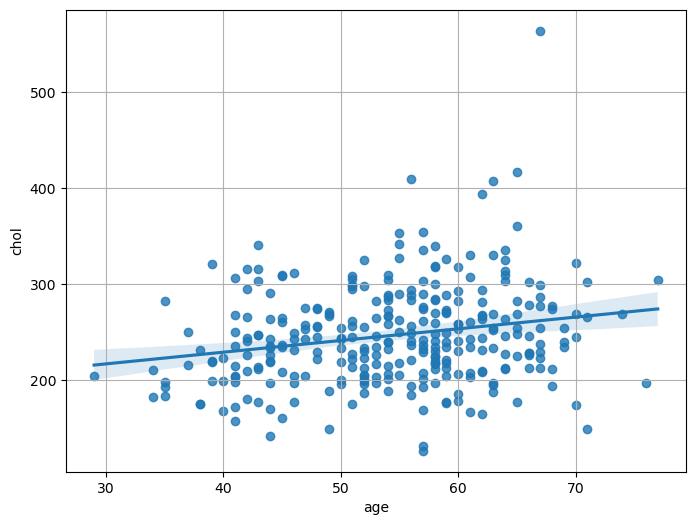

In [235]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=df)
plt.grid()
plt.show()

#### Interpretation

- The above plot confirms that there is a slighly positive correlation between `age` and `chol` variables.

##  Check with ASSERT statement <a class="anchor" id="11"></a>


- We must confirm that our dataset has no missing values. 

- We can write an **assert statement** to verify this. 

- We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present. 

- This gives us confidence that our code is running properly.

- **Assert statement** will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

- **Asserts**

  - assert 1 == 1 (return Nothing if the value is True)

  - assert 1 == 2 (return AssertionError if the value is False)

In [242]:
assert pd.notnull(df).all().all()

In [244]:
assert (df >= 0).all().all()

#### Interpretation

- The above two commands do not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset. 

- All the values are greater than or equal to zero.

# Outlier detection

# age

In [262]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

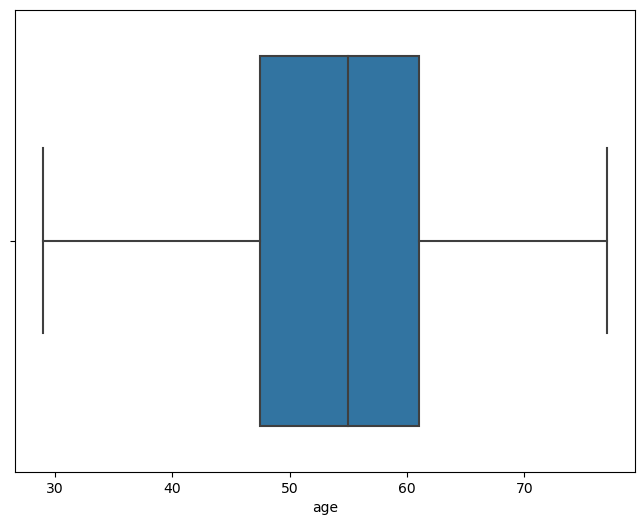

In [268]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['age'])
plt.show()

# trestbps

In [272]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

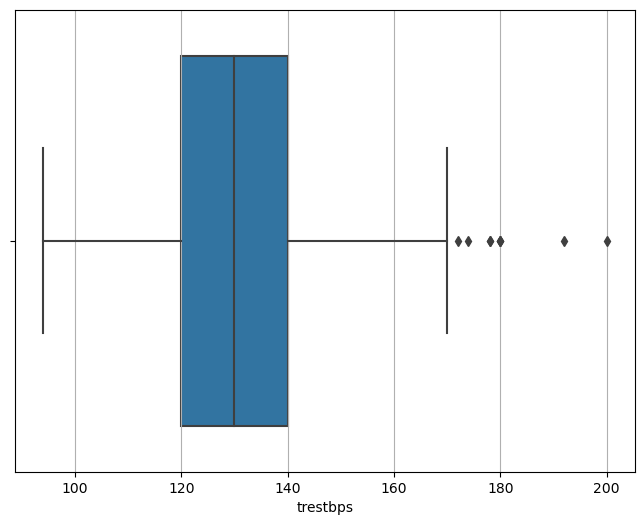

In [278]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['trestbps'])
plt.grid(axis='x')
plt.show()

# chol

In [287]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

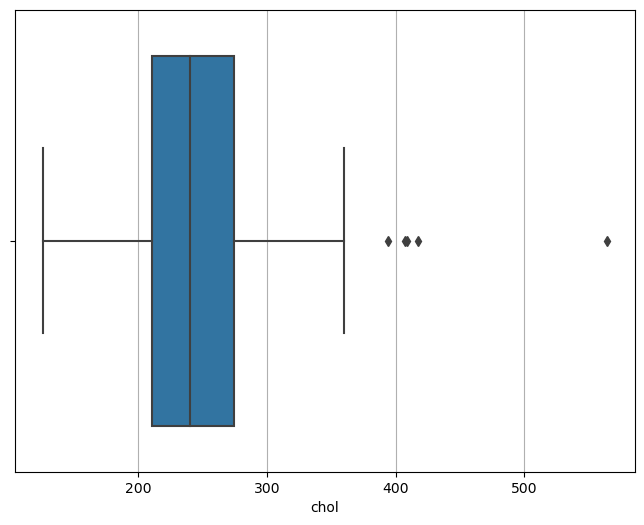

In [289]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['chol'])
plt.grid(axis='x')
plt.show()

# thalach

In [295]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

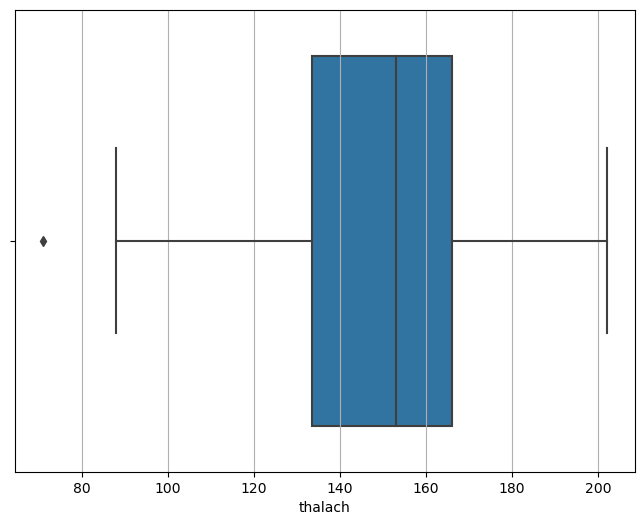

In [297]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['thalach'])
plt.grid(axis='x')
plt.show()

# oldpeak

In [302]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

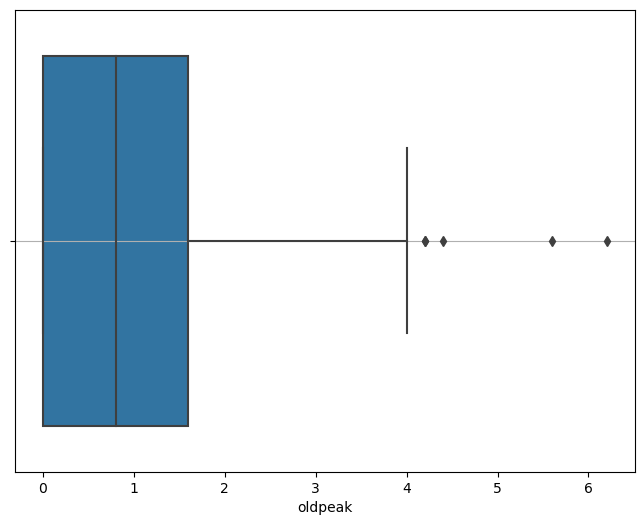

In [312]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=df['oldpeak'])
plt.grid(axis='y')
plt.show()

#### Findings

- The `age` variable does not contain any outlier.

- `trestbps` variable contains outliers to the right side.

- `chol` variable also contains outliers to the right side.

- `thalach` variable contains a single outlier to the left side.

- `oldpeak` variable contains outliers to the right side.

- Those variables containing outliers needs further investigation.


# Conclusion
EDA Journey Conclusion:

- Our exploratory data analysis (`EDA`) journey has now come to an end. We have thoroughly explored the heart disease dataset and gained valuable insights throughout the process.

Analysis Focus:

- The primary feature of interest was the target variable, which represents the presence (1) or absence (0) of heart disease.
- We have analyzed this variable individually and also examined how it interacts with other features in the dataset.

Methods Applied:

- We have implemented various strategies from the book "Think Stats: Exploratory Data Analysis in Python" by Allen B. Downey to guide our analysis.
The analysis included visualizing distributions, checking correlations, and identifying
patterns between the target variable and other features.

Handling Missing Data and Outliers:

- We also discussed methods for detecting and handling missing data and outliers in the dataset, ensuring that the analysis is accurate and reliable.

Final Thoughts:

- I hope you enjoyed this comprehensive EDA journey and gained insights into the heart disease dataset.
- The methods and findings presented here provide a solid foundation for further analysis and modeling.

Thank you for following along!